In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import re

import h5py
from tqdm import tqdm

from utils import load_and_format_data_as_df, get_birds_in_time_range, get_velocity_order_parameter

In [2]:
# # this will load the data from the hdf5 file and format it as a pandas dataframe
# # the hdf5 files need to be in the current directory (same as the notebook)
# # ONLY RUN THIS CELL ONCE TO GET THE CSV FILES

# for dirname, _, filenames in os.walk('./'):
#     for filename in filenames:
#         path = os.path.join(dirname, filename)
#         if '.hdf5' in filename:
#             print(f'loading {path}')
#             df = load_and_format_data_as_df(path)
#             df.to_csv(f"./{filename.replace('.hdf5', '.csv')}", index=False)
#             print(f'saved under {filename.replace(".hdf5", ".csv")}')

In [3]:
df_A = pd.read_csv('A_nodes.csv', index_col=0)
df_B = pd.read_csv('B_nodes.csv', index_col=0)
df_C = pd.read_csv('C_nodes.csv', index_col=0)

In [4]:
# data encompasses "flock formation, circling, and landing" over a 30 minute period
# ~1800 chimney swift birds
# there are regions reported where the birds are highly correlated - when flying - and less correlated - when landing - as the intention of the study

In [5]:
# range of time in minutes
(df_A.time.max() - df_A.time.min()) / 60, (df_B.time.max() - df_B.time.min()) / 60, (df_C.time.max() - df_C.time.min()) / 60

(8.505727950172396, 9.431653876098322, 8.19263708152597)

In [6]:
# individual time ranges for tracks
# A
df_A.groupby('tid').apply(lambda x: x.time.max() - x.time.min()).describe()

count    24966.000000
mean         7.405351
std          6.848828
min          0.934268
25%          2.535869
50%          5.071738
75%         10.010010
max        100.066733
dtype: float64

In [7]:
# individual time ranges for tracks
# B
df_B.groupby('tid').apply(lambda x: x.time.max() - x.time.min()).describe()

count    78498.000000
mean         6.520097
std          5.619826
min          0.934268
25%          2.435769
50%          4.671338
75%          8.842176
max         59.092426
dtype: float64

In [8]:
# individual time ranges for tracks
# C
df_C.groupby('tid').apply(lambda x: x.time.max() - x.time.min()).describe()

count    39403.000000
mean         4.478242
std          3.859843
min          0.934268
25%          1.968635
50%          3.169837
75%          5.472139
max         42.442442
dtype: float64

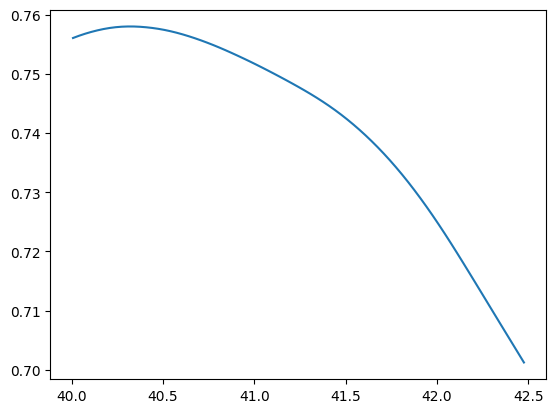

In [24]:
# get all tracks that last for the entire duration


time_start = 40
time_end = 42.5




df = get_birds_in_time_range(df_A, time_start, time_end)

vel_order = get_velocity_order_parameter(df)

plt.plot(vel_order)


In [65]:
# calculate velocity order parameter

